In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d adityajn105/flickr8k

Dataset URL: https://www.kaggle.com/datasets/adityajn105/flickr8k
License(s): CC0-1.0


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/flickr8k.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import pandas as pd

# 1. Load fresh captions file — make sure this is the CSV or .txt with image filenames and captions only
df = pd.read_csv('captions.txt')  # only 'image' and 'caption' columns expected

# 2. Group captions per image
df_grouped = df.groupby('image')['caption'].apply(list).reset_index()

# 3. Filter only images with exactly 5 captions (Flickr8k format)
df_grouped = df_grouped[df_grouped['caption'].apply(len) == 5].reset_index(drop=True)

# 4. Split captions into separate columns
captions_df = pd.DataFrame(df_grouped['caption'].tolist(),
                           columns=['caption1', 'caption2', 'caption3', 'caption4', 'caption5'])

# 5. Combine image column back
df_final = pd.concat([df_grouped['image'], captions_df], axis=1)

# 6. Save final version
df_final.to_csv('flickr_captions_grouped.csv', index=False)

print("✅ Grouped captions saved as flickr_captions_grouped.csv")


✅ Grouped captions saved as flickr_captions_grouped.csv


In [ ]:
print(df_final.columns)

Index(['image', 'caption1', 'caption2', 'caption3', 'caption4', 'caption5'], dtype='object')


In [ ]:
print(df_final.head())

                       image  \
0  1000268201_693b08cb0e.jpg   
1  1001773457_577c3a7d70.jpg   
2  1002674143_1b742ab4b8.jpg   
3  1003163366_44323f5815.jpg   
4  1007129816_e794419615.jpg   

                                            caption1  \
0  A child in a pink dress is climbing up a set o...   
1         A black dog and a spotted dog are fighting   
2  A little girl covered in paint sits in front o...   
3  A man lays on a bench while his dog sits by him .   
4     A man in an orange hat starring at something .   

                                            caption2  \
0              A girl going into a wooden building .   
1  A black dog and a tri-colored dog playing with...   
2  A little girl is sitting in front of a large p...   
3  A man lays on the bench to which a white dog i...   
4            A man wears an orange hat and glasses .   

                                            caption3  \
0   A little girl climbing into a wooden playhouse .   
1  A black dog and a 

In [ ]:
# Shuffle the dataset
df_shuffled = df_final.sample(n=1500, random_state=42).reset_index(drop=True)

# Save the new dataset with 2000 images
df_shuffled.to_csv("Flickr8k_2000.csv", index=False)

print("New dataset with 2000 images saved successfully!")

New dataset with 2000 images saved successfully!


In [ ]:
print(df_shuffled.shape)
print(df_shuffled.head())

(1500, 6)
                       image  \
0  3139895886_5a6d495b13.jpg   
1  3133825703_359a0c414d.jpg   
2   244910177_7c4ec3f65b.jpg   
3  2127207912_9298824e66.jpg   
4  1810651611_35aae644fb.jpg   

                                            caption1  \
0  A black-and-white dog bounds off the ground , ...   
1                         A child staring at Santa .   
2  Three woman walk down a city street and one ha...   
3  The two people are standing on a rock , holdin...   
4            A closeup of a little girl on a swing .   

                                            caption2  \
0  A black and white dog is jumping over high yel...   
1  A father and son looking at a funny looking Sa...   
2  Three women , two with tattoos , walking down ...   
3  Three people make their way through rocky terr...   
4  A little girl in a dress with pink flowers swi...   

                                            caption3  \
0  A black and white dog is jumping through a fie...   
1  A little

In [ ]:
import cv2
import matplotlib.pyplot as plt

def read_and_preprocess(image_path):
  img = cv2.imread("/content/Images/" + image_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img,(224,224))
  img = img/255.0
  return img

In [ ]:
df_shuffled['image'] = df_shuffled['image'].apply(lambda x: read_and_preprocess(x))

In [ ]:
print(df_shuffled.head(5))

                                               image  \
0  [[[0.6941176470588235, 0.5607843137254902, 0.4...   
1  [[[0.00392156862745098, 0.00392156862745098, 0...   
2  [[[0.058823529411764705, 0.06666666666666667, ...   
3  [[[0.7372549019607844, 0.5843137254901961, 0.5...   
4  [[[0.5019607843137255, 0.6549019607843137, 0.7...   

                                            caption1  \
0  A black-and-white dog bounds off the ground , ...   
1                         A child staring at Santa .   
2  Three woman walk down a city street and one ha...   
3  The two people are standing on a rock , holdin...   
4            A closeup of a little girl on a swing .   

                                            caption2  \
0  A black and white dog is jumping over high yel...   
1  A father and son looking at a funny looking Sa...   
2  Three women , two with tattoos , walking down ...   
3  Three people make their way through rocky terr...   
4  A little girl in a dress with pink flowers 

In [ ]:
type(df_shuffled['image'])

pandas.core.series.Series

In [ ]:
df_shuffled.dtypes

,0
image,object
caption1,object
caption2,object
caption3,object
caption4,object
caption5,object


In [ ]:
df_shuffled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image     1500 non-null   object
 1   caption1  1500 non-null   object
 2   caption2  1500 non-null   object
 3   caption3  1500 non-null   object
 4   caption4  1500 non-null   object
 5   caption5  1500 non-null   object
dtypes: object(6)
memory usage: 70.4+ KB


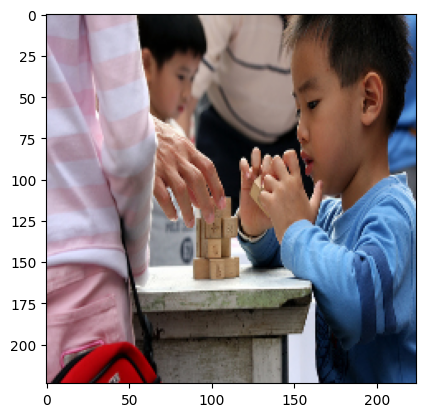

In [ ]:
plt.imshow(df_shuffled['image'][200])

#Text Processing

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer # Change 'tokenizer' to 'Tokenizer'

In [ ]:
corpus = ""

for i in df['caption']:
  corpus += " " + i

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([corpus, "startseq", "endseq"])

In [ ]:
len(corpus)

2270913

In [ ]:
tokenizer.word_index

{'a': 1,
 'in': 2,
 'the': 3,
 'on': 4,
 'is': 5,
 'and': 6,
 'dog': 7,
 'with': 8,
 'man': 9,
 'of': 10,
 'two': 11,
 'white': 12,
 'black': 13,
 'boy': 14,
 'are': 15,
 'woman': 16,
 'girl': 17,
 'to': 18,
 'wearing': 19,
 'at': 20,
 'people': 21,
 'water': 22,
 'red': 23,
 'young': 24,
 'brown': 25,
 'an': 26,
 'his': 27,
 'blue': 28,
 'dogs': 29,
 'running': 30,
 'through': 31,
 'playing': 32,
 'while': 33,
 'shirt': 34,
 'down': 35,
 'standing': 36,
 'ball': 37,
 'little': 38,
 'grass': 39,
 'snow': 40,
 'child': 41,
 'person': 42,
 'jumping': 43,
 'over': 44,
 'three': 45,
 'front': 46,
 'sitting': 47,
 'holding': 48,
 'up': 49,
 'field': 50,
 'small': 51,
 'by': 52,
 'large': 53,
 'green': 54,
 'one': 55,
 'group': 56,
 'yellow': 57,
 'her': 58,
 'walking': 59,
 'children': 60,
 'men': 61,
 'into': 62,
 'air': 63,
 'beach': 64,
 'near': 65,
 'mouth': 66,
 'jumps': 67,
 'another': 68,
 'for': 69,
 'street': 70,
 'runs': 71,
 'its': 72,
 'from': 73,
 'riding': 74,
 'stands': 75,
 

In [ ]:
df_shuffled['caption1'] = df_shuffled['caption1'].apply(tokenizer.texts_to_sequences)
df_shuffled['caption2'] = df_shuffled['caption2'].apply(tokenizer.texts_to_sequences)
df_shuffled['caption3'] = df_shuffled['caption3'].apply(tokenizer.texts_to_sequences)
df_shuffled['caption4'] = df_shuffled['caption4'].apply(tokenizer.texts_to_sequences)
df_shuffled['caption5'] = df_shuffled['caption5'].apply(tokenizer.texts_to_sequences)

In [ ]:
df_shuffled

,image,caption1,caption2,caption3,caption4,caption5
0,"[[[0.6941176470588235, 0.5607843137254902, 0.4...","[[1], [], [5672], [], [1], [3146], [], [], [1]...","[[1], [], [5672], [], [1], [3146], [], [], [1]...","[[1], [], [5672], [], [1], [3146], [], [], [1]...","[[1], [], [4891], [1850], [], [], [8318], [314...","[[291], [7404], [], [], [5672], [], [1], [3146..."
1,"[[[0.00392156862745098, 0.00392156862745098, 0...","[[1], [], [3146], [7404], [1393], [], [4891], ...","[[1], [], [], [1], [291], [7404], [], [8318], ...","[[1], [], [], [1393], [291], [291], [], [], []...","[[291], [7404], [], [], [3146], [7404], [1393]...","[[291], [7404], [], [], [], [1393], [291], [29..."
2,"[[[0.058823529411764705, 0.06666666666666667, ...","[[291], [7404], [8318], [], [], [], [], [1850]...","[[291], [7404], [8318], [], [], [], [], [1850]...","[[], [1850], [5911], [], [4097], [], [1], [831...","[[], [1850], [5911], [], [4097], [], [], [1], ...","[[], [1850], [5911], [], [4097], [], [], [1], ..."
3,"[[[0.7372549019607844, 0.5843137254901961, 0.5...","[[291], [7404], [], [], [291], [], [1850], [],...","[[291], [7404], [8318], [], [], [], [3750], []...","[[291], [7404], [8318], [], [], [], [3750], []...","[[291], [], [1850], [], [], [], [5911], [1], [...","[[291], [], [1850], [], [3750], [], [1850], [3..."
4,"[[[0.5019607843137255, 0.6549019607843137, 0.7...","[[1], [], [3146], [], [1850], [3432], [], [314...","[[1], [], [], [1393], [291], [291], [], [], []...","[[1], [], [], [1393], [291], [291], [], [], []...","[[1], [], [], [1850], [3147], [4097], [], [], ...","[[291], [7404], [], [], [], [1393], [291], [29..."
...,...,...,...,...,...,...
1495,"[[[0.3215686274509804, 0.3176470588235294, 0.2...","[[1], [], [5911], [1], [], [], [], [], [], [1]...","[[1], [], [5911], [1], [4097], [], [1393], [40...","[[1], [], [5911], [1], [4097], [], [], [1393],...","[[1], [], [5911], [1], [4097], [], [], [1393],...","[[1], [], [5911], [1], [4097], [], [], [1393],..."
1496,"[[[0.5686274509803921, 0.0392156862745098, 0.0...","[[1], [], [5911], [1], [4097], [], [], [1850],...","[[1], [], [5911], [1], [4097], [], [], [1850],...","[[1], [], [5911], [1], [4097], [], [3432], [29...","[[1], [], [5911], [1393], [4891], [4891], [], ...","[[1], [4097], [], [1850], [], [4891], [], [831..."
1497,"[[[0.3411764705882353, 0.4666666666666667, 0.6...","[[1], [], [7404], [1], [4097], [], [], [], [],...","[[1], [], [3750], [], [8318], [3432], [1850], ...","[[1], [], [], [], [], [], [1850], [], [], [375...","[[7404], [1], [4097], [], [], [], [], [1393], ...","[[], [1393], [291], [], [], [], [], [], [1393]..."
1498,"[[[0.6, 0.7098039215686275, 0.7568627450980392...","[[1], [], [5672], [8318], [1850], [], [4097], ...","[[1], [], [4891], [1850], [], [], [1393], [409...","[[1], [], [4891], [1850], [], [], [1393], [343...","[[1], [], [4891], [1850], [], [], [1393], [343...","[[1], [], [4891], [1850], [], [], [3750], [], ..."


In [ ]:
def remove_empty_lists(caption):
    # This function removes empty lists from a given caption
    return [item for item in caption if item]

In [ ]:
for col in ['caption1', 'caption2', 'caption3', 'caption4', 'caption5']:
    df_shuffled[col] = df_shuffled[col].apply(remove_empty_lists)

In [ ]:
start_idx = tokenizer.word_index.get("startseq")
end_idx = tokenizer.word_index.get("endseq")
print(start_idx)
print(end_idx)

8494
8495


In [ ]:
def add_start_end_tokens(caption):
    return [[start_idx]] + caption + [[end_idx]]  # Add tokens to the start and end

# Apply the function to all caption columns
for col in ['caption1', 'caption2', 'caption3', 'caption4', 'caption5']:
    df_shuffled[col] = df_shuffled[col].apply(add_start_end_tokens)

In [ ]:
df_shuffled.head()

,image,caption1,caption2,caption3,caption4,caption5
0,"[[[0.6941176470588235, 0.5607843137254902, 0.4...","[[8494], [1], [5672], [1], [3146], [1], [4097]...","[[8494], [1], [5672], [1], [3146], [1], [4097]...","[[8494], [1], [5672], [1], [3146], [1], [4097]...","[[8494], [1], [4891], [1850], [8318], [3147], ...","[[8494], [291], [7404], [5672], [1], [3146], [..."
1,"[[[0.00392156862745098, 0.00392156862745098, 0...","[[8494], [1], [3146], [7404], [1393], [4891], ...","[[8494], [1], [1], [291], [7404], [8318], [1],...","[[8494], [1], [1393], [291], [291], [5672], [1...","[[8494], [291], [7404], [3146], [7404], [1393]...","[[8494], [291], [7404], [1393], [291], [291], ..."
2,"[[[0.058823529411764705, 0.06666666666666667, ...","[[8494], [291], [7404], [8318], [1850], [5911]...","[[8494], [291], [7404], [8318], [1850], [5911]...","[[8494], [1850], [5911], [4097], [1], [8318], ...","[[8494], [1850], [5911], [4097], [1], [4891], ...","[[8494], [1850], [5911], [4097], [1], [1393], ..."
3,"[[[0.7372549019607844, 0.5843137254901961, 0.5...","[[8494], [291], [7404], [291], [1850], [3750],...","[[8494], [291], [7404], [8318], [3750], [1850]...","[[8494], [291], [7404], [8318], [3750], [1850]...","[[8494], [291], [1850], [5911], [1], [7404], [...","[[8494], [291], [1850], [3750], [1850], [3750]..."
4,"[[[0.5019607843137255, 0.6549019607843137, 0.7...","[[8494], [1], [3146], [1850], [3432], [3147], ...","[[8494], [1], [1393], [291], [291], [1393], [8...","[[8494], [1], [1393], [291], [291], [1393], [8...","[[8494], [1], [1850], [3147], [4097], [1393], ...","[[8494], [291], [7404], [1393], [291], [291], ..."


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np
import pandas as pd
import cv2  # OpenCV for resizing

# Load ResNet50 model (pre-trained on ImageNet, without top layers)
model_resnet = ResNet50(weights='imagenet', include_top=False, pooling='avg')

def extract_features_from_arrays(image_arrays):
    features = []
    for i, img in enumerate(image_arrays):
        img_resized = cv2.resize(img, (224, 224))  # Resize
        img_array = np.expand_dims(img_resized, axis=0)  # Add batch dimension
        img_array = preprocess_input(img_array)  # Normalize

        # Extract features (this should be (1, 2048))
        feature = model_resnet.predict(img_array)

        # Store correctly (flattening is unnecessary since it's already (1, 2048))
        features.append(feature[0])  # Append without flattening

    return np.array(features)

# Run feature extraction again
image_features = extract_features_from_arrays(df_shuffled['image'].tolist())

# Confirm the shape
print(f"Final Extracted Image Features Shape: {image_features.shape}")  # Expected: (2000, 2048)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1

In [ ]:
type(image_features)

numpy.ndarray

In [ ]:
image_features.shape

(1500, 2048)

In [ ]:
# Find max caption length dynamically
max_caption_length = max(df_shuffled[['caption1', 'caption2', 'caption3', 'caption4', 'caption5']].applymap(len).max())

<ipython-input-33-a8324aaa0437>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  max_caption_length = max(df_shuffled[['caption1', 'caption2', 'caption3', 'caption4', 'caption5']].applymap(len).max())


In [ ]:
max_caption_length

101

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad all captions
for col in ['caption1', 'caption2', 'caption3', 'caption4', 'caption5']:
    df_shuffled[col] = pad_sequences(df_shuffled[col], maxlen=max_caption_length, padding='post').tolist()

In [ ]:
import numpy as np

# Convert each column into a NumPy array
caption_arrays = []
for col in ['caption1', 'caption2', 'caption3', 'caption4', 'caption5']:
    captions = np.array(df_shuffled[col].tolist())
    caption_arrays.append(captions)

# Stack captions along the second axis (5 captions per image)
X_texts = np.stack(caption_arrays, axis=1)  # Shape: (2000, 5, max_caption_length)

# Create target labels by shifting sequences
y_labels = np.array(X_texts[:, :, 1:])  # Remove first word in each caption

print(f"✅ X_texts Shape: {X_texts.shape}")  # Expected: (2000, 5, max_caption_length)
print(f"✅ y_labels Shape: {y_labels.shape}")  # Expected: (2000, 5, max_caption_length - 1)

✅ X_texts Shape: (1500, 5, 101, 1)
✅ y_labels Shape: (1500, 5, 100, 1)


In [ ]:
X_texts = np.squeeze(X_texts, axis=-1)  # Removes last axis
y_labels = np.squeeze(y_labels, axis=-1)  # Removes last axis

print(X_texts.shape)  # Should be (2000, 5, 101)
print(y_labels.shape)  # Should be (2000, 5, 100)

(1500, 5, 101)
(1500, 5, 100)


In [ ]:
# Repeat image features for all 5 captions
X_images_flat = np.repeat(image_features, 5, axis=0)
X_texts_flat = X_texts.reshape(-1, X_texts.shape[2])
y_labels_flat = y_labels.reshape(-1, y_labels.shape[2])

print(f"✅ X_images_flat Shape: {X_images_flat.shape}")  # (10000, 2048)
print(f"✅ X_texts_flat Shape: {X_texts_flat.shape}")  # (10000, max_caption_length)
print(f"✅ y_labels_flat Shape: {y_labels_flat.shape}")  # (10000, max_caption_length - 1)

✅ X_images_flat Shape: (7500, 2048)
✅ X_texts_flat Shape: (7500, 101)
✅ y_labels_flat Shape: (7500, 100)


In [ ]:
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, Concatenate, Lambda, TimeDistributed, Reshape
from tensorflow.keras.models import Model

# Use the actual maximum length from your data
# max_caption_length = 101  # This should be 101 based on your error
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 256

# Rebuild the model with correct sequence length
image_input = Input(shape=(2048,))
image_dense = Dense(embedding_dim, activation="relu")(image_input)
image_reshaped = Reshape((1, embedding_dim))(image_dense)

text_input = Input(shape=(max_caption_length,))  # Now using correct length
text_embedding = Embedding(vocab_size, embedding_dim, mask_zero=False)(text_input)

# Tile image features
def tile_image_features(x):
    image_feat = x[0]
    seq_len = tf.shape(x[1])[1]
    return tf.tile(image_feat, [1, seq_len, 1])

image_features_tiled = Lambda(tile_image_features)([image_reshaped, text_input])

# Concatenate features
merged = Concatenate(axis=-1)([text_embedding, image_features_tiled])

# LSTM layer
lstm_layer = LSTM(512, return_sequences=True)(merged)
output = TimeDistributed(Dense(vocab_size, activation="softmax"))(lstm_layer)

# Create model
caption_model = Model(inputs=[image_input, text_input], outputs=output)
caption_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

caption_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 2048)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 256)            │        524,544 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_2             │ (None, 101)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape (Reshape)         │ (None, 1, 256)         │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 101, 256)       │      2,174,976 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda (Lambda)           │ (None, 101, 256)       │              0 │ reshape[0][0],         │
│                           │                        │                │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 101, 512)       │              0 │ embedding[0][0],       │
│                           │                        │                │ lambda[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 101, 512)       │      2,099,200 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ time_distributed          │ (None, 101, 8496)      │      4,358,448 │ lstm[0][0]             │
│ (TimeDistributed)         │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 9,157,168 (34.93 MB)

 Trainable params: 9,157,168 (34.93 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Pad y_labels_flat to match length 101
y_labels_flat = pad_sequences(
    y_labels_flat,
    maxlen=101,
    padding='post',
    truncating='post',
    dtype='int32'
)

In [ ]:
print("Final data shapes:")
print(f"X_images_flat: {X_images_flat.shape}")  # Should be (N, 2048)
print(f"X_texts_flat: {X_texts_flat.shape}")    # Should be (N, 101)
print(f"y_labels_flat: {y_labels_flat.shape}")   # Should be (N, 101)

Final data shapes:
X_images_flat: (7500, 2048)
X_texts_flat: (7500, 101)
y_labels_flat: (7500, 101)


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 3. Define Callbacks
callbacks = [
    ModelCheckpoint(
        "best_caption_model.h5",
        monitor='val_loss',
        save_best_only=True,
        mode='min',
        save_weights_only=False
    ),
    EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.1,
        patience=3,
        verbose=1
    )
]

In [ ]:
history = caption_model.fit(
    [X_images_flat, X_texts_flat],
    y_labels_flat,
    batch_size=64,
    epochs=15,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.6056 - loss: 5.9939

94/94 ━━━━━━━━━━━━━━━━━━━━ 29s 211ms/step - accuracy: 0.6062 - loss: 5.9701 - val_accuracy: 0.6776 - val_loss: 1.3968 - learning_rate: 1.0000e-04
Epoch 2/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.6740 - loss: 1.2908

94/94 ━━━━━━━━━━━━━━━━━━━━ 20s 208ms/step - accuracy: 0.6740 - loss: 1.2899 - val_accuracy: 0.6776 - val_loss: 1.0467 - learning_rate: 1.0000e-04
Epoch 3/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.6777 - loss: 1.0170

94/94 ━━━━━━━━━━━━━━━━━━━━ 21s 210ms/step - accuracy: 0.6778 - loss: 1.0167 - val_accuracy: 0.7232 - val_loss: 0.9324 - learning_rate: 1.0000e-04
Epoch 4/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.7187 - loss: 0.9295

94/94 ━━━━━━━━━━━━━━━━━━━━ 19s 197ms/step - accuracy: 0.7187 - loss: 0.9294 - val_accuracy: 0.7233 - val_loss: 0.8846 - learning_rate: 1.0000e-04
Epoch 5/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.7175 - loss: 0.8927

94/94 ━━━━━━━━━━━━━━━━━━━━ 20s 196ms/step - accuracy: 0.7175 - loss: 0.8926 - val_accuracy: 0.7233 - val_loss: 0.8623 - learning_rate: 1.0000e-04
Epoch 6/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.7204 - loss: 0.8662

94/94 ━━━━━━━━━━━━━━━━━━━━ 22s 209ms/step - accuracy: 0.7204 - loss: 0.8662 - val_accuracy: 0.7275 - val_loss: 0.8493 - learning_rate: 1.0000e-04
Epoch 7/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.7237 - loss: 0.8558

94/94 ━━━━━━━━━━━━━━━━━━━━ 20s 210ms/step - accuracy: 0.7237 - loss: 0.8558 - val_accuracy: 0.7330 - val_loss: 0.8396 - learning_rate: 1.0000e-04
Epoch 8/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.7351 - loss: 0.8451

94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 197ms/step - accuracy: 0.7351 - loss: 0.8451 - val_accuracy: 0.7439 - val_loss: 0.8271 - learning_rate: 1.0000e-04
Epoch 9/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.7445 - loss: 0.8278

94/94 ━━━━━━━━━━━━━━━━━━━━ 19s 197ms/step - accuracy: 0.7445 - loss: 0.8278 - val_accuracy: 0.7489 - val_loss: 0.8095 - learning_rate: 1.0000e-04
Epoch 10/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.7461 - loss: 0.8147

94/94 ━━━━━━━━━━━━━━━━━━━━ 21s 198ms/step - accuracy: 0.7461 - loss: 0.8146 - val_accuracy: 0.7491 - val_loss: 0.7924 - learning_rate: 1.0000e-04
Epoch 11/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.7455 - loss: 0.7998

94/94 ━━━━━━━━━━━━━━━━━━━━ 20s 198ms/step - accuracy: 0.7455 - loss: 0.7998 - val_accuracy: 0.7500 - val_loss: 0.7808 - learning_rate: 1.0000e-04
Epoch 12/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.7494 - loss: 0.7811

94/94 ━━━━━━━━━━━━━━━━━━━━ 21s 200ms/step - accuracy: 0.7494 - loss: 0.7811 - val_accuracy: 0.7537 - val_loss: 0.7724 - learning_rate: 1.0000e-04
Epoch 13/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.7528 - loss: 0.7744

94/94 ━━━━━━━━━━━━━━━━━━━━ 19s 201ms/step - accuracy: 0.7528 - loss: 0.7744 - val_accuracy: 0.7593 - val_loss: 0.7655 - learning_rate: 1.0000e-04
Epoch 14/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.7571 - loss: 0.7713

94/94 ━━━━━━━━━━━━━━━━━━━━ 20s 210ms/step - accuracy: 0.7571 - loss: 0.7712 - val_accuracy: 0.7606 - val_loss: 0.7593 - learning_rate: 1.0000e-04
Epoch 15/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.7588 - loss: 0.7627

94/94 ━━━━━━━━━━━━━━━━━━━━ 19s 198ms/step - accuracy: 0.7588 - loss: 0.7627 - val_accuracy: 0.7614 - val_loss: 0.7541 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 15.


In [ ]:
caption_model.save("best_caption_model.h5")